In [7]:
import pandas as pd


In [11]:
#load the inventory data set
inventory_data = pd.read_csv('inventory.csv')

In [12]:
#load new inventory data set
new_inventory=pd.read_csv("new inventory.csv")

In [15]:
inventory_data.columns

Index(['Item Number', 'Date', 'Inventory'], dtype='object')

In [16]:
new_inventory.columns

Index(['Item Number', 'Inventory Receive', 'Total Item Qty'], dtype='object')

In [18]:
#convert date columns to date time
inventory_data['Date'] = pd.to_datetime(inventory_data['Date'])
new_inventory['Inventory Receive date'] = pd.to_datetime(new_inventory['Inventory Receive'])

In [19]:
#merge the data sets
merged_data = pd.merge(inventory_data, new_inventory, on='Item Number', how='outer')


In [20]:
#create empty Dataframe to store the inventory levels
future_dates = pd.date_range(start='6/17/2023', end='8/26/2023', freq='W')



In [21]:
#create a empy data frame to store inventory levels
result_df = pd.DataFrame(index=future_dates)

In [38]:
# Iterate through items and calculate inventory levels for each future date
for item in merged_data['Item Number'].unique():
    item_data = merged_data[merged_data['Item Number'] == item]
    inventory_levels = []

    for date in future_dates:
        total_inventory = item_data.loc[item_data['Date'] <= date, 'Inventory'].sum()
        new_inventory1 = item_data.loc[
            (item_data['Inventory Receive date'] <= date) & (item_data['Inventory Receive date'].notnull()),
            'Total Item Qty'].sum()
        inventory_levels.append(total_inventory + new_inventory1)

    result_df[item] = inventory_levels


In [41]:
print(result_df)

            064-01-1347  064-01-1361  064-01-1375  064-01-1385  064-01-1399  \
2023-06-18      16044.0      18340.0       8052.0      22744.0      27596.0   
2023-06-25      16044.0      18340.0       8052.0      22744.0      27596.0   
2023-07-02      16044.0      18340.0       8052.0      22744.0      27596.0   
2023-07-09      17044.0      18964.0       9632.0      23440.0      28496.0   
2023-07-16      17044.0      18964.0       9632.0      23440.0      28496.0   
2023-07-23      17044.0      18964.0       9632.0      23440.0      28496.0   
2023-07-30      17044.0      18964.0       9632.0      23440.0      28496.0   
2023-08-06      17044.0      18964.0       9632.0      23440.0      28496.0   
2023-08-13      17044.0      18964.0       9632.0      23440.0      28496.0   
2023-08-20      17044.0      18964.0      13032.0      23440.0      28496.0   

            064-01-1409  064-01-1423  064-01-1430  064-01-1437  064-01-1444  \
2023-06-18      42840.0       6618.0       7353.0  

In [42]:
for index, row in result_df.iterrows():
    print(f'{index.strftime("%m/%d/%Y")}', end='\t')
    for col in result_df.columns:
        print(f'{row[col]}\t', end='')
    print()

06/18/2023	16044.0	18340.0	8052.0	22744.0	27596.0	42840.0	6618.0	7353.0	4112.0	18347.0	13312.0	13043.0	2.0	8157.0	22437.0	18135.0	2904.0	6060.0	5.0	10347.0	10768.0	16864.0	13036.0	16000.0	8169.0	5672.0	16170.0	12340.0	13280.0	16407.0	15199.0	27960.0	10.0	1.0	4.0	7.0	8.0	40.0	175.0	37.0	1.0	1.0	1.0	1.0	7464.0	14660.0	11724.0	15018.0	15348.0	18138.0	4.0	16.0	90.0	88.0	54.0	76456.0	97164.0	101.0	57.0	67.0	155.0	29.0	143.0	104.0	157.0	74.0	51497.0	51484.0	139696.0	27.0	135.0	73.0	44448.0	49389.0	50209.0	107395.0	100780.0	54130.0	43.0	62894.0	20.0	70161.0	2.0	103.0	133.0	69.0	1.0	68173.0	68052.0	55.0	74.0	398.0	467.0	27.0	1.0	649.0	167.0	62.0	91.0	122.0	116.0	69.0	245436.0	68796.0	18.0	73091.0	189381.0	176.0	118.0	52.0	192963.0	75183.0	16.0	147.0	80913.0	65914.0	199.0	30855.0	197.0	43812.0	128.0	42720.0	107.0	252.0	255.0	65688.0	15520.0	69335.0	70512.0	193378.0	195134.0	3.0	2.0	97.0	6.0	647.0	181.0	69.0	10.0	11.0	1.0	1.0	12.0	21.0	49.0	46.0	71882.0	1.0	1.0	1.0	1.0	47904.0	176.0	83.0	35934.0

In [44]:
import matplotlib.pyplot as plt


In [46]:
# Calculate total monthly inventory levels
monthly_totals = result_df.resample('M').sum()

<Figure size 1000x600 with 0 Axes>

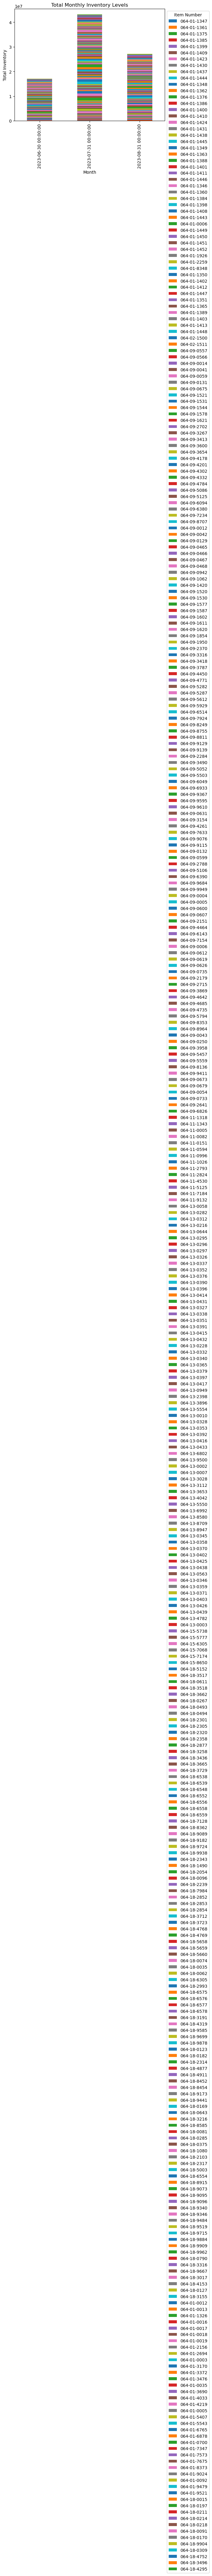

In [47]:
# Plot total monthly inventory levels
plt.figure(figsize=(10, 6))
monthly_totals.plot(kind='bar', stacked=True)
plt.title('Total Monthly Inventory Levels')
plt.xlabel('Month')
plt.ylabel('Total Inventory')
plt.legend(title='Item Number', bbox_to_anchor=(1, 1))
plt.show()

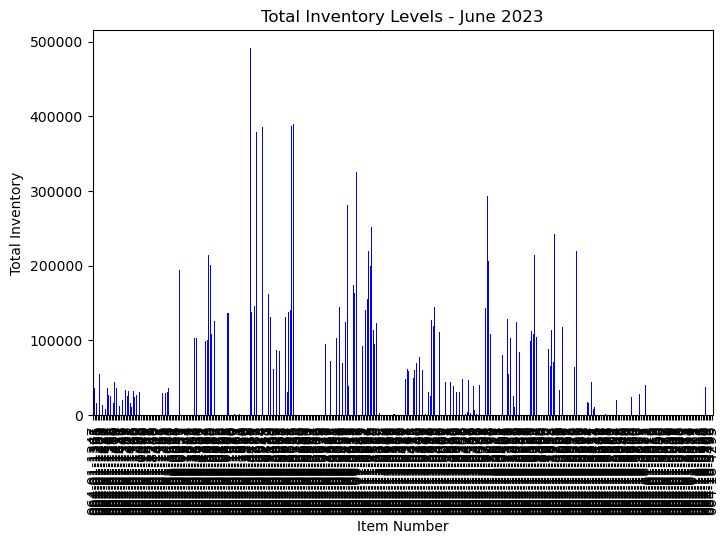

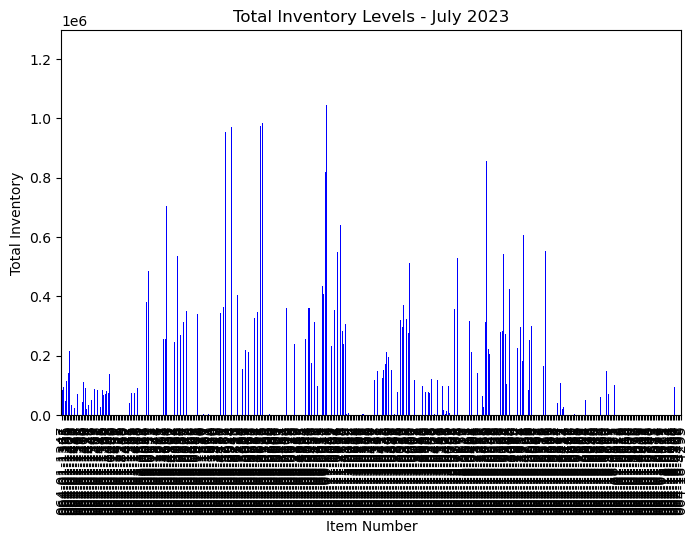

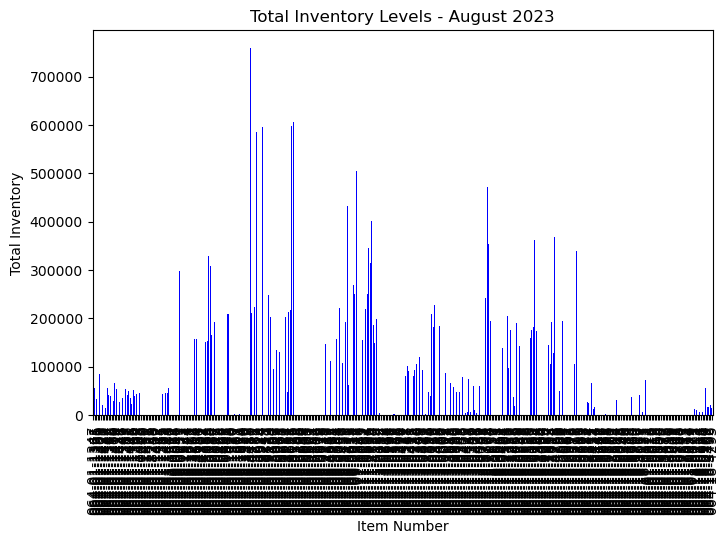

In [48]:
import matplotlib.pyplot as plt

# Calculate total monthly inventory levels
monthly_totals = result_df.resample('M').sum()

# Plot individual bar charts for each month
for month in monthly_totals.index:
    plt.figure(figsize=(8, 5))
    monthly_totals.loc[month].plot(kind='bar', color='blue')
    plt.title(f'Total Inventory Levels - {month.strftime("%B %Y")}')
    plt.xlabel('Item Number')
    plt.ylabel('Total Inventory')
    plt.show()
